In [ ]:
import zipfile
import os

# Define paths
zip_path_1 = '/content/drive/MyDrive/HAM10000 dir/HAM10000_images_part_1.zip'
zip_path_2 = '/content/drive/MyDrive/HAM10000 dir/HAM10000_images_part_2.zip'
extract_path = '/content/'
output_folder_1 = os.path.join(extract_path, 'HAM10000 PT1')
output_folder_2 = os.path.join(extract_path, 'HAM10000 PT2')

# Create output folders if they don't exist
os.makedirs(output_folder_1, exist_ok=True)
os.makedirs(output_folder_2, exist_ok=True)

# Function to unzip a file to a specific directory
def unzip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Unzip the first file into the first output folder
unzip_file(zip_path_1, output_folder_1)

# Unzip the second file into the second output folder
unzip_file(zip_path_2, output_folder_2)

print(f"Files from {zip_path_1} have been extracted to {output_folder_1}")
print(f"Files from {zip_path_2} have been extracted to {output_folder_2}")



Files from /content/drive/MyDrive/HAM10000 dir/HAM10000_images_part_1.zip have been extracted to /content/HAM10000 PT1
Files from /content/drive/MyDrive/HAM10000 dir/HAM10000_images_part_2.zip have been extracted to /content/HAM10000 PT2


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.

import os
print(os.listdir("../content/drive/MyDrive/HAM10000 dir"))


['HAM10000_images_part_1.zip', 'HAM10000_images_part_2.zip', 'Ham10000 metadata csv.csv', 'Ham10000 metadata.gsheet', 'HAM 10000 metadata.csv']


In [ ]:
# Define the path to your CSV file
csv_file_path = '/content/HAM10000_metadata'

# Read the CSV file with the correct delimiter
df = pd.read_csv(csv_file_path, delimiter=',')
#read metadata
df.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [ ]:
from os.path import isfile
from PIL import Image as pil_image
df['num_images'] = df.groupby('lesion_id')["image_id"].transform("count")

classes = df['dx'].unique()
labeldict = {}
for num, name in enumerate(classes):
    labeldict[name] = num
df['dx_id'] = df['dx'].map(lambda x: labeldict[x])


def expand_path(p):
    if isfile('../content/HAM10000 PT1/' + p + '.jpg'): return '../content/HAM10000 PT1/' + p + '.jpg'
    if isfile('../content/HAM10000 PT2/' + p + '.jpg'): return '../content/HAM10000 PT2/' + p + '.jpg'
    return p
df['image_path'] = df['image_id']
df['image_path'] = df['image_path'].apply(expand_path)


df['images'] = df['image_path'].map(lambda x: np.asarray(pil_image.open(x).resize((100,100))))
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,num_images,dx_id,image_path,images
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,2,0,../content/HAM10000 PT1/ISIC_0027419.jpg,"[[[190, 153, 195], [192, 155, 197], [191, 153,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,2,0,../content/HAM10000 PT1/ISIC_0025030.jpg,"[[[24, 13, 22], [24, 14, 24], [25, 14, 28], [3..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,2,0,../content/HAM10000 PT1/ISIC_0026769.jpg,"[[[186, 128, 137], [190, 134, 148], [194, 137,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,2,0,../content/HAM10000 PT1/ISIC_0025661.jpg,"[[[24, 11, 17], [25, 12, 22], [36, 21, 30], [5..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,2,0,../content/HAM10000 PT2/ISIC_0031633.jpg,"[[[132, 89, 112], [146, 101, 124], [158, 114, ..."


In [ ]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

lesion_ID_dict = {
    'nv': 0,
    'mel': 1,
    'bkl': 2,
    'bcc': 3,
    'akiec': 4,
    'vasc': 5,
    'df': 6
}

lesion_names = ['Melanocytic nevi','Melanoma','Benign keratosis-like lesions ',
               'Basal cell carcinoma','Actinic keratoses','Vascular lesions',
               'Dermatofibroma']

lesion_names_short = ['nv','mel','bkl','bcc','akiec','vasc','df']

df['lesion_type']=df['dx'].map(lesion_type_dict)
df['lesion_ID'] = df['dx'].map(lesion_ID_dict)

print('Total number of images',len(df))
print('The problem is unbalanced, since Melanocytic nevi is much more frequent that other labels')

df['lesion_type'].value_counts()

Total number of images 10015
The problem is unbalanced, since Melanocytic nevi is much more frequent that other labels


lesion_type
Melanocytic nevi                  6705
Melanoma                          1113
Benign keratosis-like lesions     1099
Basal cell carcinoma               514
Actinic keratoses                  327
Vascular lesions                   142
Dermatofibroma                     115
Name: count, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.utils import class_weight

In [ ]:
# Split the data into training, validation, and test sets
X = np.stack(df['images'].values)
y = to_categorical(df['dx_id'], num_classes=len(df['dx'].unique()))

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print('Train dataset shape',X_train.shape)
print('Test dataset shape',X_test.shape)

Train dataset shape (8012, 100, 100, 3)
Test dataset shape (1002, 100, 100, 3)


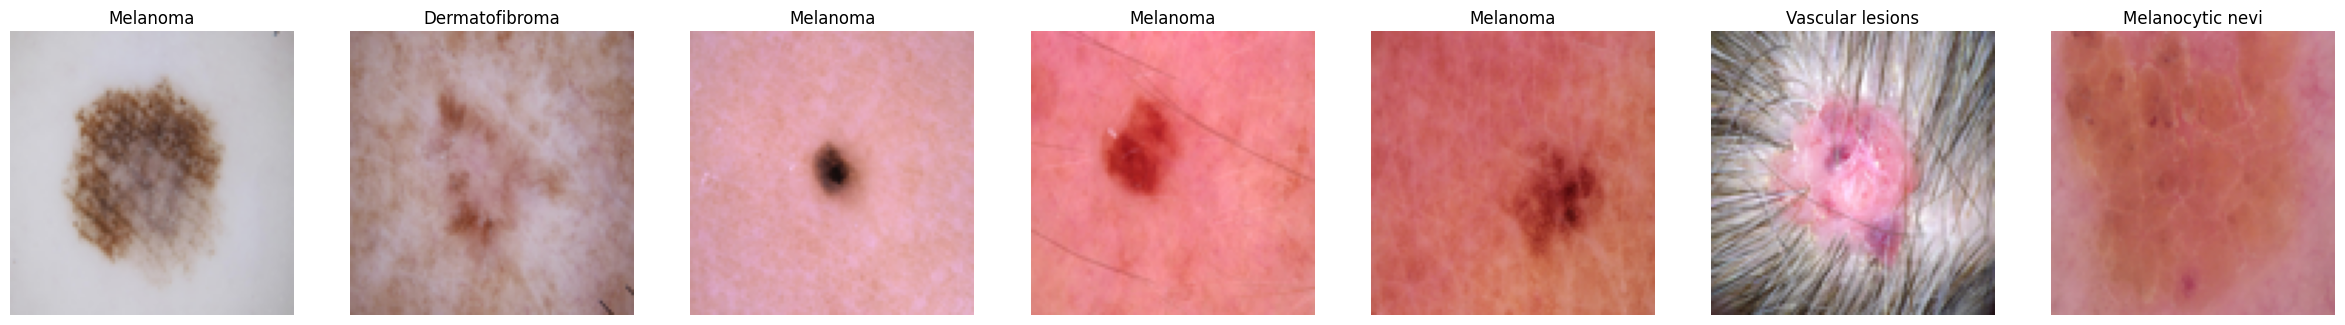

In [ ]:
fig, ax = plt.subplots(1, 7, figsize=(30, 30))
for i in range(7):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i])
    ax[i].set_title(lesion_names[np.argmax(y_train[i])])

In [ ]:
# Calculate class weights to handle class imbalance
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df['dx_id']),
    y=df['dx_id']
)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

print('The problem is unbalanced. We need to provide class_weights ')
print(class_weights)

The problem is unbalanced. We need to provide class_weights 
{0: 1.301832835044846, 1: 0.21338020666879728, 2: 12.440993788819876, 3: 1.2854575792581184, 4: 10.075452716297788, 5: 2.78349082823791, 6: 4.375273044997815}


In [ ]:
# Loading the ResNet50 model, pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(classes), activation='softmax')(x)

# Creating the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base_model layers
for layer in base_model.layers:
    layer.trainable = False

# Print model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 106, 106, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 50, 50, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 50, 50, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

In [ ]:
# Optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping_monitor = EarlyStopping(patience=10, monitor='val_accuracy', restore_best_weights=True)
model_checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', save_weights_only=False, monitor='val_accuracy', mode='auto', save_best_only=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-6)

# Data Augmentation
datagen = ImageDataGenerator(
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2
)

batch_size = 32
epochs= 40

# Create augmented training dataset
train_gen = datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=True)

# Validation dataset (no augmentation)
validation_datagen = ImageDataGenerator()
validation_gen = validation_datagen.flow(X_test, y_test, batch_size=batch_size, shuffle=False)

# Fit data for data augmentation
datagen.fit(X_train)

# Train the model
history = model.fit(
    train_gen,
    epochs=epochs,
    validation_data=validation_gen,
    callbacks=[model_checkpoint_callback, lr_scheduler],
    steps_per_epoch=len(X_train) // batch_size,
    validation_steps=len(X_test) // batch_size,
    class_weight=class_weights
)

Epoch 1/40
250/250 [==============================] - ETA: 0s - loss: 1.7366 - accuracy: 0.4485
Epoch 1: val_accuracy improved from -inf to 0.60585, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


250/250 [==============================] - 24s 83ms/step - loss: 1.7366 - accuracy: 0.4485 - val_loss: 1.0038 - val_accuracy: 0.6058 - lr: 0.0010
Epoch 2/40
250/250 [==============================] - ETA: 0s - loss: 1.3389 - accuracy: 0.5380
Epoch 2: val_accuracy did not improve from 0.60585
250/250 [==============================] - 19s 77ms/step - loss: 1.3389 - accuracy: 0.5380 - val_loss: 1.1063 - val_accuracy: 0.5776 - lr: 0.0010
Epoch 3/40
250/250 [==============================] - ETA: 0s - loss: 1.2376 - accuracy: 0.5573
Epoch 3: val_accuracy improved from 0.60585 to 0.64617, saving model to best_model.h5
250/250 [==============================] - 20s 79ms/step - loss: 1.2376 - accuracy: 0.5573 - val_loss: 0.9590 - val_accuracy: 0.6462 - lr: 0.0010
Epoch 4/40
250/250 [==============================] - ETA: 0s - loss: 1.1526 - accuracy: 0.5811
Epoch 4: val_accuracy improved from 0.64617 to 0.67339, saving model to best_model.h5
250/250 [==============================] - 20s 79ms

In [ ]:
# Evaluate the model on the test set
test_gen = validation_datagen.flow(X_test, y_test, batch_size=32, shuffle=False)
score = model.evaluate(test_gen, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8732205033302307
Test accuracy: 0.6776447296142578


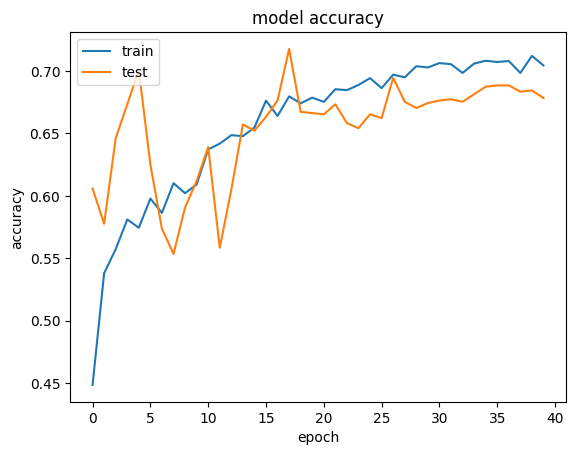

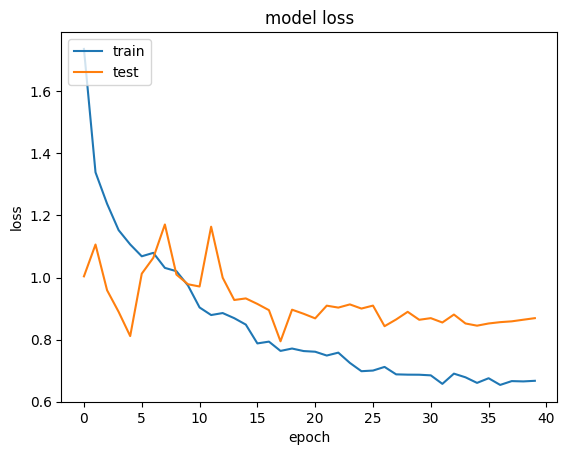

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(y_pred)):
    if np.argmax(y_pred[i]) == np.argmax(y_test[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)

    total += 1

print('Total-test-data;', total, '\taccurately-predicted-data:', accurate, '\t wrongly-predicted-data: ', total - accurate)

print('Accuracy:', round(accurate/total*100, 3), '%')

32/32 [==============================] - 2s 28ms/step
Total-test-data; 1002 	accurately-predicted-data: 679 	 wrongly-predicted-data:  323
Accuracy: 67.764 %


In [ ]:
from tensorflow.keras.models import load_model
best_model = load_model('best_model.h5')

# compute predictions
y_pred_prob = np.around(best_model.predict(X_test),3)
y_pred = np.argmax(y_pred_prob,axis=1)

y_test2 = np.argmax(y_test,axis=1)

32/32 [==============================] - 2s 28ms/step


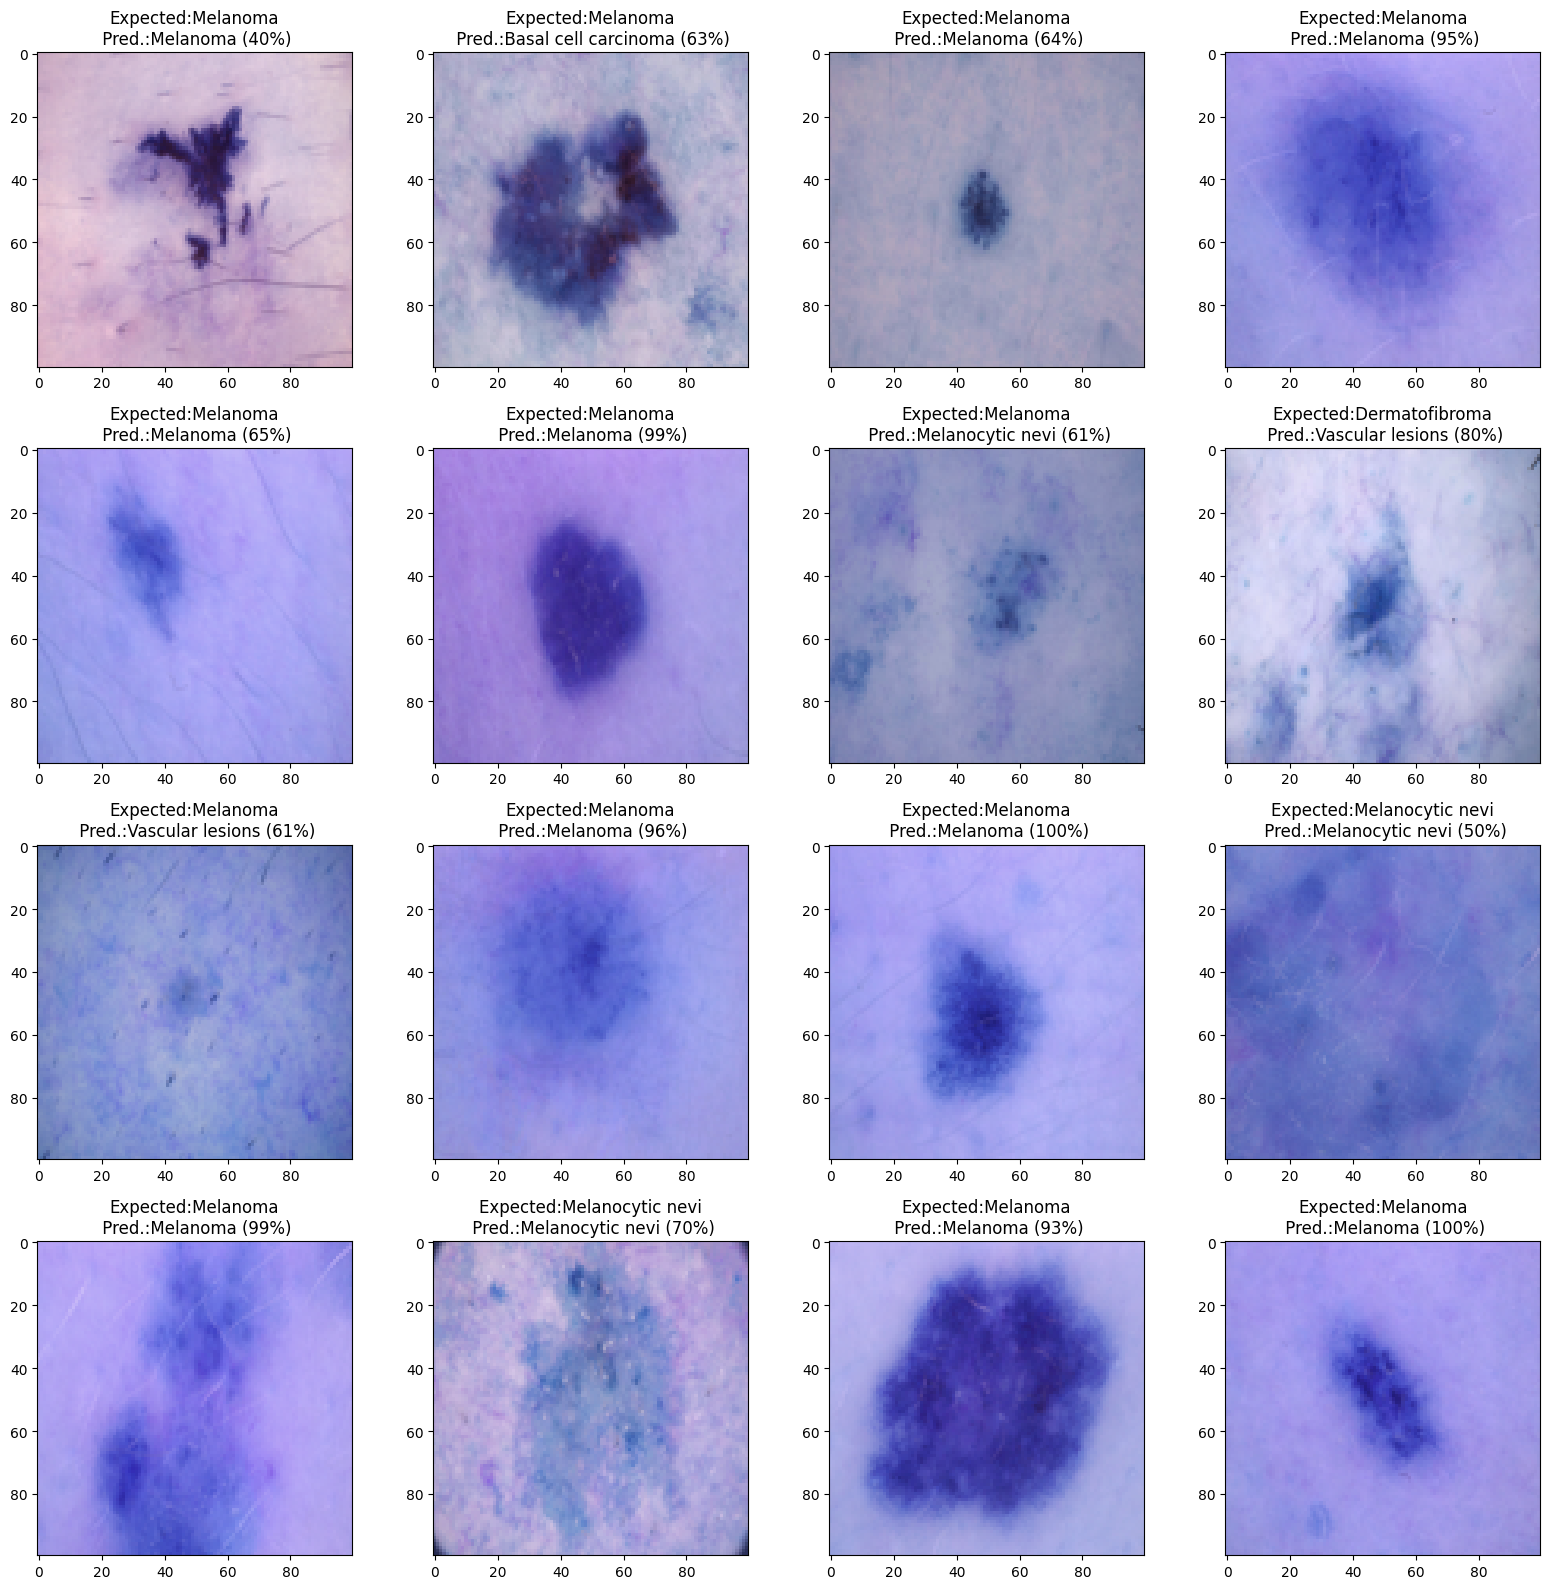

In [ ]:
plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    index = i+100
    plt.imshow(X_test[index,:,:,::-1])
    label_exp = lesion_names[y_test2[index]]  #expected label
    label_pred = lesion_names[y_pred[index]]  #predicted label
    label_pred_prob = round(np.max(y_pred_prob[index])*100)
    plt.title('Expected:'+str(label_exp)+'\n Pred.:'+str(label_pred)+' ('+str(label_pred_prob)+'%)')
plt.ylabel('')
plt.tight_layout()
plt.savefig('final_figure.png',dpi=300)
plt.show()

In [ ]:
print('Accuracy for label equal to 0')
print(np.mean(y_test2[y_test2 == 0] == y_pred[y_test2 == 0]))

print('Accuracy for label different from 0')
print(np.mean(y_test2[y_test2 != 0] == y_pred[y_test2 != 0]))

Accuracy for label equal to 0
0.8
Accuracy for label different from 0
0.7085201793721974


In [ ]:
acc_tot= []

for i in range(7):
    acc_parz = round(np.mean(y_test2[y_test2 == i] == y_pred[y_test2 == i]),2)
    lab_parz = lesion_names[i]
    print('accuracy for',lab_parz,'=',acc_parz)
    acc_tot.append(acc_parz)

accuracy for Melanocytic nevi = 0.8
accuracy for Melanoma = 0.77
accuracy for Benign keratosis-like lesions  = 0.64
accuracy for Basal cell carcinoma = 0.5
accuracy for Actinic keratoses = 0.57
accuracy for Vascular lesions = 0.56
accuracy for Dermatofibroma = 0.5


In [ ]:
acc_tot = np.array(acc_tot)
freq = np.unique(y_test2,return_counts=True)[1]

np.sum(acc_tot*freq)/np.sum(freq)

0.7193712574850298

32/32 [==============================] - 1s 28ms/step


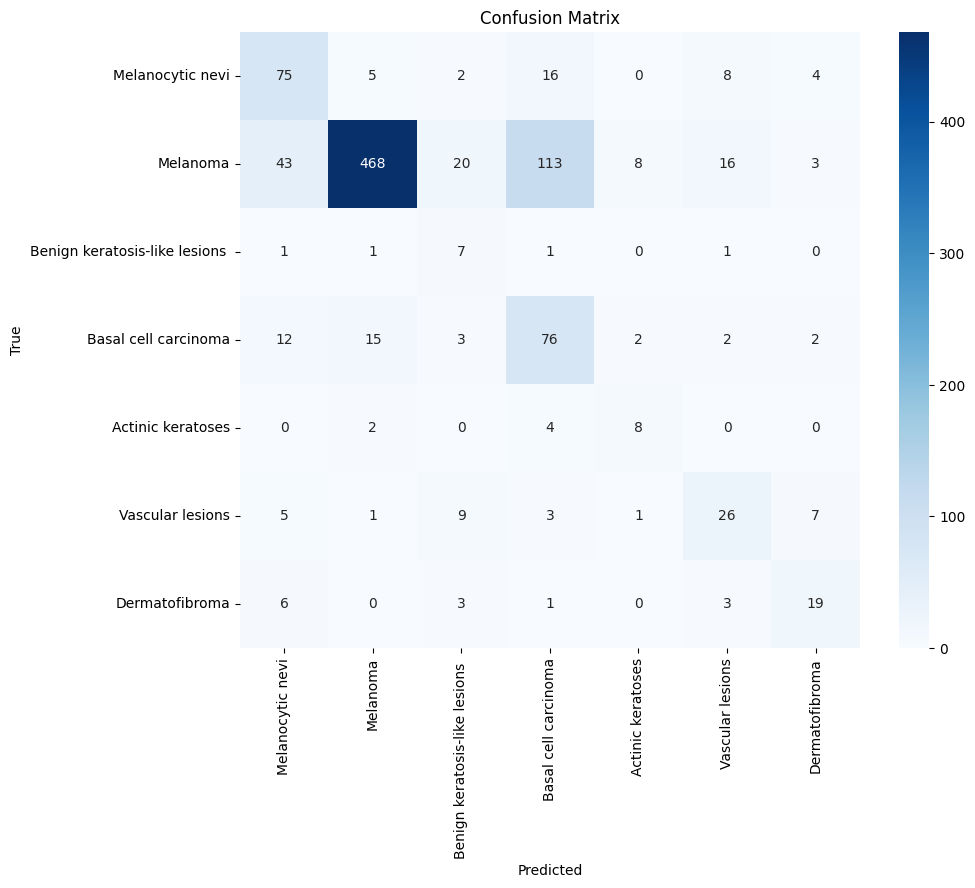

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Predict using the model
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_true = np.argmax(y_test, axis=1)


# Compute confusion matrix
cm = confusion_matrix(y_test_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lesion_names, yticklabels=lesion_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Classification Report: {'Melanocytic nevi': {'precision': 0.528169014084507, 'recall': 0.6818181818181818, 'f1-score': 0.5952380952380952, 'support': 110}, 'Melanoma': {'precision': 0.9512195121951219, 'recall': 0.6974664679582713, 'f1-score': 0.8048151332760104, 'support': 671}, 'Benign keratosis-like lesions ': {'precision': 0.1590909090909091, 'recall': 0.6363636363636364, 'f1-score': 0.2545454545454546, 'support': 11}, 'Basal cell carcinoma': {'precision': 0.35514018691588783, 'recall': 0.6785714285714286, 'f1-score': 0.4662576687116564, 'support': 112}, 'Actinic keratoses': {'precision': 0.42105263157894735, 'recall': 0.5714285714285714, 'f1-score': 0.48484848484848486, 'support': 14}, 'Vascular lesions': {'precision': 0.4642857142857143, 'recall': 0.5, 'f1-score': 0.4814814814814815, 'support': 52}, 'Dermatofibroma': {'precision': 0.5428571428571428, 'recall': 0.59375, 'f1-score': 0.5671641791044776, 'support': 32}, 'accuracy': 0.6776447105788423, 'macro avg': {'precision': 0.488

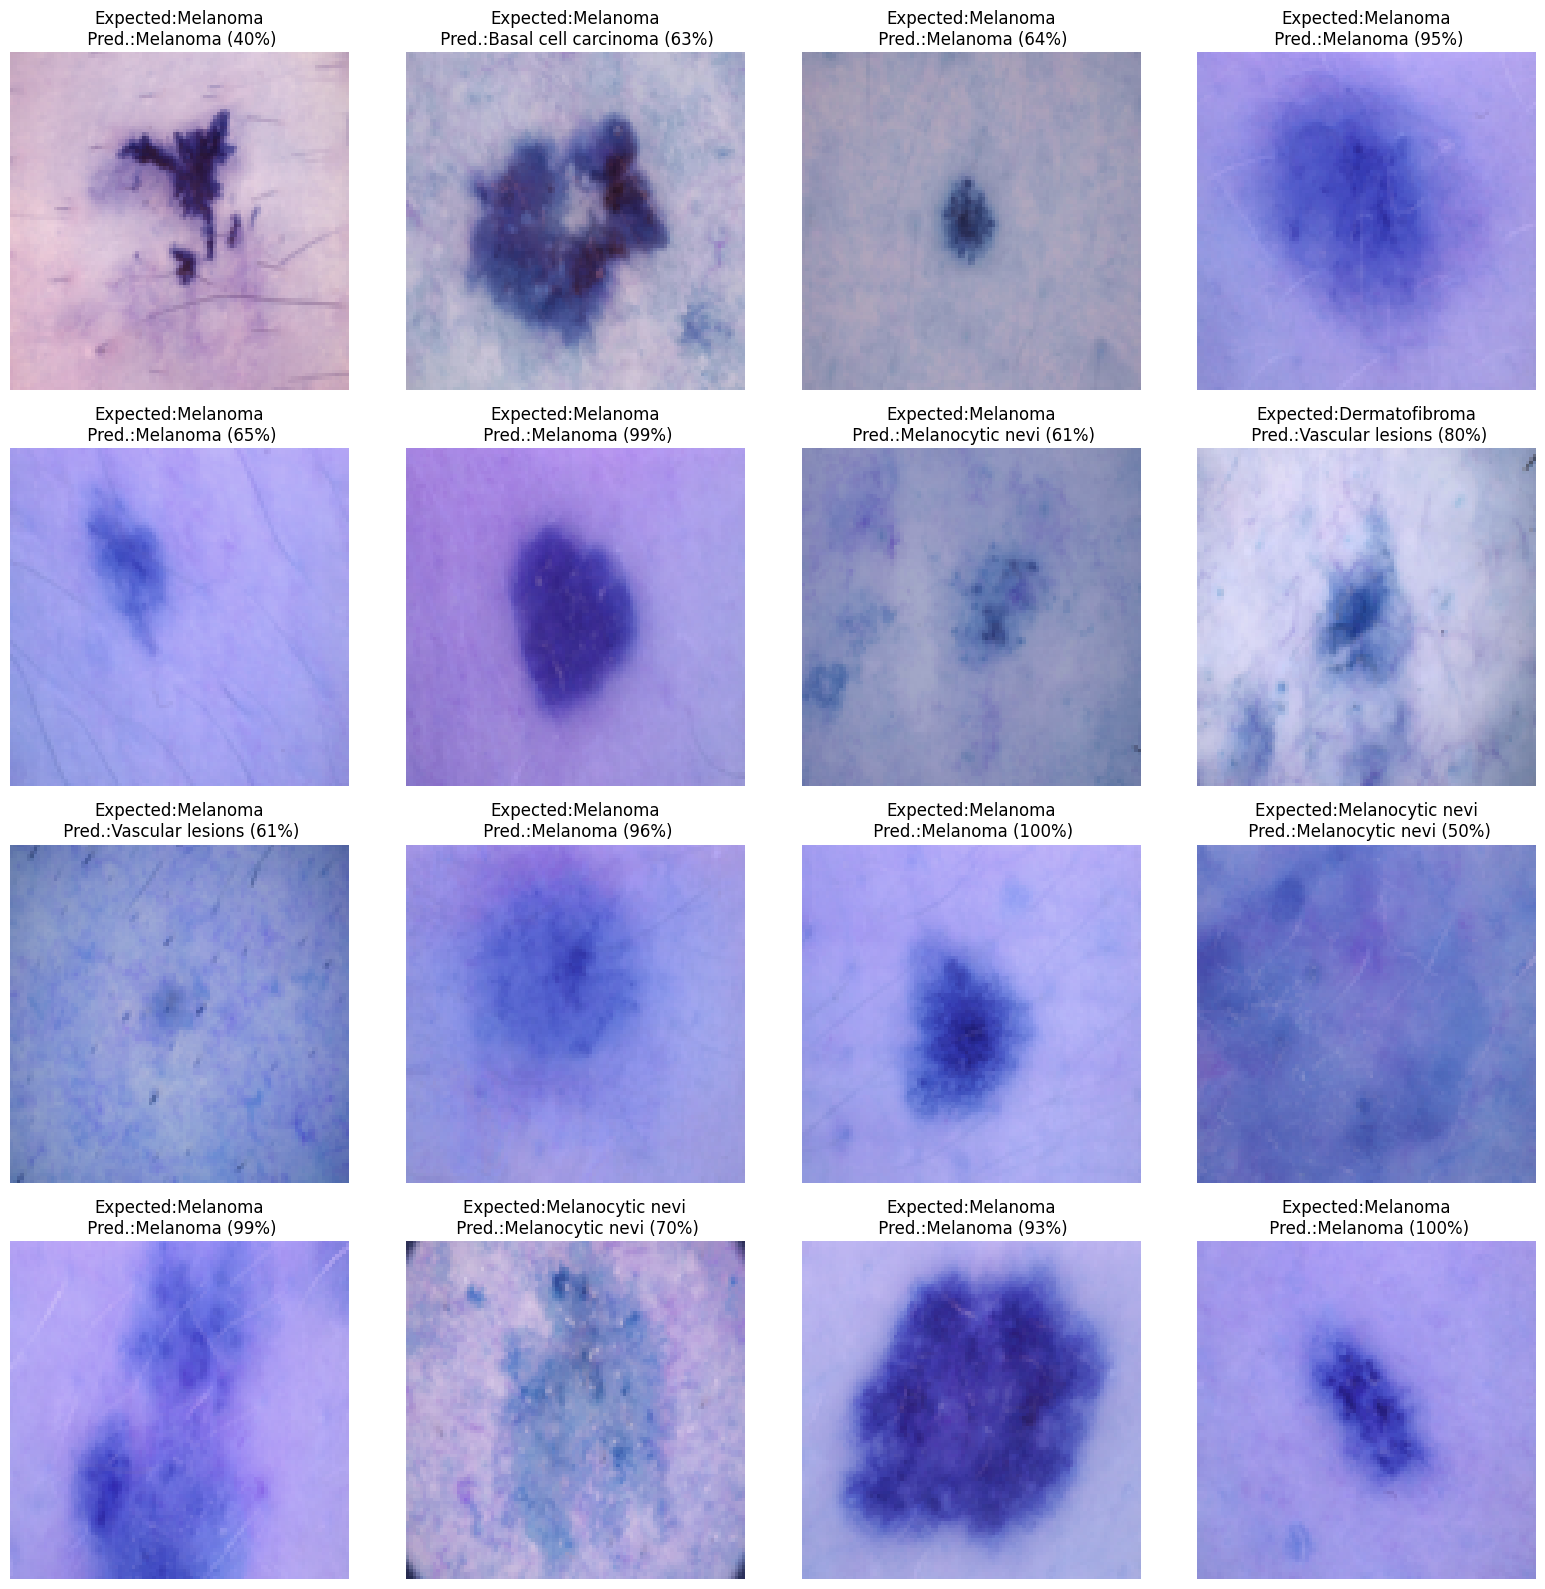

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sns


# Classification report
report = classification_report(y_test_true, y_pred, target_names=lesion_names, output_dict=True)
print('Classification Report:', report)

# Extract metrics
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1 = report['weighted avg']['f1-score']
specificity = (cm.sum() - cm.sum(axis=0) - cm.sum(axis=1) + np.diag(cm)).sum() / (cm.sum() - cm.sum(axis=1)).sum()
efficiency = (precision + recall) / 2

print(f'Precision: {precision:.4f}')
print(f'Recall (Sensitivity): {recall:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'Efficiency: {efficiency:.4f}')
print(f'F1 Score: {f1:.4f}')

# Compute predictions with the best model
y_pred_prob_best = np.around(best_model.predict(X_test), 3)
y_pred_best = np.argmax(y_pred_prob_best, axis=1)

# Display sample predictions
plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    index = i + 100
    plt.imshow(X_test[index, :, :, ::-1])
    label_exp = lesion_names[y_test_true[index]]  # expected label
    label_pred = lesion_names[y_pred_best[index]]  # predicted label
    label_pred_prob = round(np.max(y_pred_prob_best[index]) * 100)
    plt.title('Expected:' + str(label_exp) + '\n Pred.:' + str(label_pred) + ' (' + str(label_pred_prob) + '%)')
    plt.axis('off')
plt.tight_layout()
plt.savefig('final_figure.png', dpi=300)
plt.show()